In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [3]:
df1=pd.read_csv('D:/pythonCode/projects/youtube-adview-prediction/train.csv')

#cleaning data

In [4]:
df1.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,14-09-2016,PT7M37S,F
1,VID_14135,2,1707,56,2,6,01-10-2016,PT9M30S,D
2,VID_2187,1,2023,25,0,2,02-07-2016,PT2M16S,C
3,VID_23096,6,620860,777,161,153,27-07-2016,PT4M22S,H
4,VID_10175,1,666,1,0,0,29-06-2016,PT31S,D


In [5]:
df1.tail(10)

,vidid,adview,views,likes,dislikes,comment,published,duration,category
14989,VID_20638,22,1204587,10284,379,2016,10-04-2013,PT10H19S,G
14990,VID_11386,15,525829,350,222,F,08-07-2016,PT29M38S,D
14991,VID_2502,1,333336,152,84,F,11-12-2015,PT18M40S,C
14992,VID_11653,1,78021,422,19,14,12-08-2016,PT2M57S,D
14993,VID_13909,11,96816,122,9,11,30-01-2014,PT2M6S,D
14994,VID_31,2,525949,1137,83,86,18-05-2015,PT6M10S,A
14995,VID_5861,1,665673,3849,156,569,20-10-2015,PT3M56S,D
14996,VID_805,4,3479,16,1,1,23-08-2013,PT3M13S,B
14997,VID_19843,1,963,0,0,0,02-10-2010,PT26S,G
14998,VID_8534,1,15212,22,5,4,19-02-2016,PT1M1S,D


In [6]:
df1.dtypes

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

In [7]:
df1.dtypes.value_counts()

object    8
int64     1
dtype: int64

In [8]:
df1.isnull().sum()

vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

In [ ]:
for i in range(len(df1['views'])):
    if df1['views'][i]=='F':
        df1['views'][i]=0

In [10]:
df1['views']=df1['views'].astype(np.int64)


In [ ]:
for i in range(len(df1['likes'])):
    if df1['likes'][i]=='F':
        df1['likes'][i]=0 
        

In [12]:
df1['likes']=df1['likes'].astype(np.int64)

In [ ]:
for i in range(len(df1['dislikes'])):
    if df1['dislikes'][i]=='F':
        df1['dislikes'][i]=0 

In [14]:
df1['dislikes']=df1['dislikes'].astype(np.int64)

In [ ]:
for i in range(len(df1['comment'])):
    if df1['comment'][i]=='F':
        df1['comment'][i]=0 

In [16]:
df1['comment']=df1['comment'].astype(np.int64)

In [17]:
df1.dtypes


vidid        object
adview        int64
views         int64
likes         int64
dislikes      int64
comment       int64
published    object
duration     object
category     object
dtype: object

#encoding categoricl values

In [34]:
cate={'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7}

In [35]:
for i in range(len(df1['category'])):
    df1['category'][i]=cate[df1['category'][i]]

C:\Users\Chara\AppData\Local\Temp/ipykernel_15312/2655812318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['category'][i]=cate[df1['category'][i]]


In [40]:
df1['category']=df1['category'].astype(int)

In [41]:
df1.dtypes

vidid        object
adview        int64
views         int64
likes         int64
dislikes      int64
comment       int64
published    object
duration     object
category      int32
dtype: object

In [167]:
import datetime
import time

def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
       mm+=i
    else:
      if(i=='H'):
        h = mm
        mm = ''
      elif(i=='M'):
        m = mm
        mm = ''
      else:
        s =mm
        mm = ''
  if(h==''):
    h = '00'
  if(m==''):
    m = '00'
  if(s==''):
    s = '00'
  bp=h+':'+m+':'+s
  return bp


def func_sec(time_string):
  h,m,s=time_string.split(':')
  return int(h)*3600+int(m)*60+int(s)



In [50]:
df1['duration']=df1['duration'].apply(checki)
df1['duration']=df1['duration'].apply(func_sec)


In [54]:
df1.drop(['vidid'],inplace=True,axis=1)

In [55]:
df1.head()

,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,14-09-2016,457,5
1,2,1707,56,2,6,01-10-2016,570,3
2,1,2023,25,0,2,02-07-2016,136,2
3,6,620860,777,161,153,27-07-2016,262,7
4,1,666,1,0,0,29-06-2016,31,3


In [59]:
label_encoder = LabelEncoder()  # LabelEncoder is used to convert string labels into numbers.
df1['published']=label_encoder.fit_transform(df1['published'])

In [64]:
df1.to_csv('D:/pythonCode/projects/youtube-adview-prediction/train_new.csv')

In [113]:
df1=pd.read_csv('D:/pythonCode/projects/youtube-adview-prediction/train_new.csv')

In [68]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [114]:
y=pd.DataFrame()
y['adviews']=df1['adview']

In [115]:
df1.drop(['Unnamed: 0'],inplace=True,axis=1)

In [116]:
df1.head()

,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,1090,457,5
1,2,1707,56,2,6,64,570,3
2,1,2023,25,0,2,122,136,2
3,6,620860,777,161,153,2090,262,7
4,1,666,1,0,0,2235,31,3


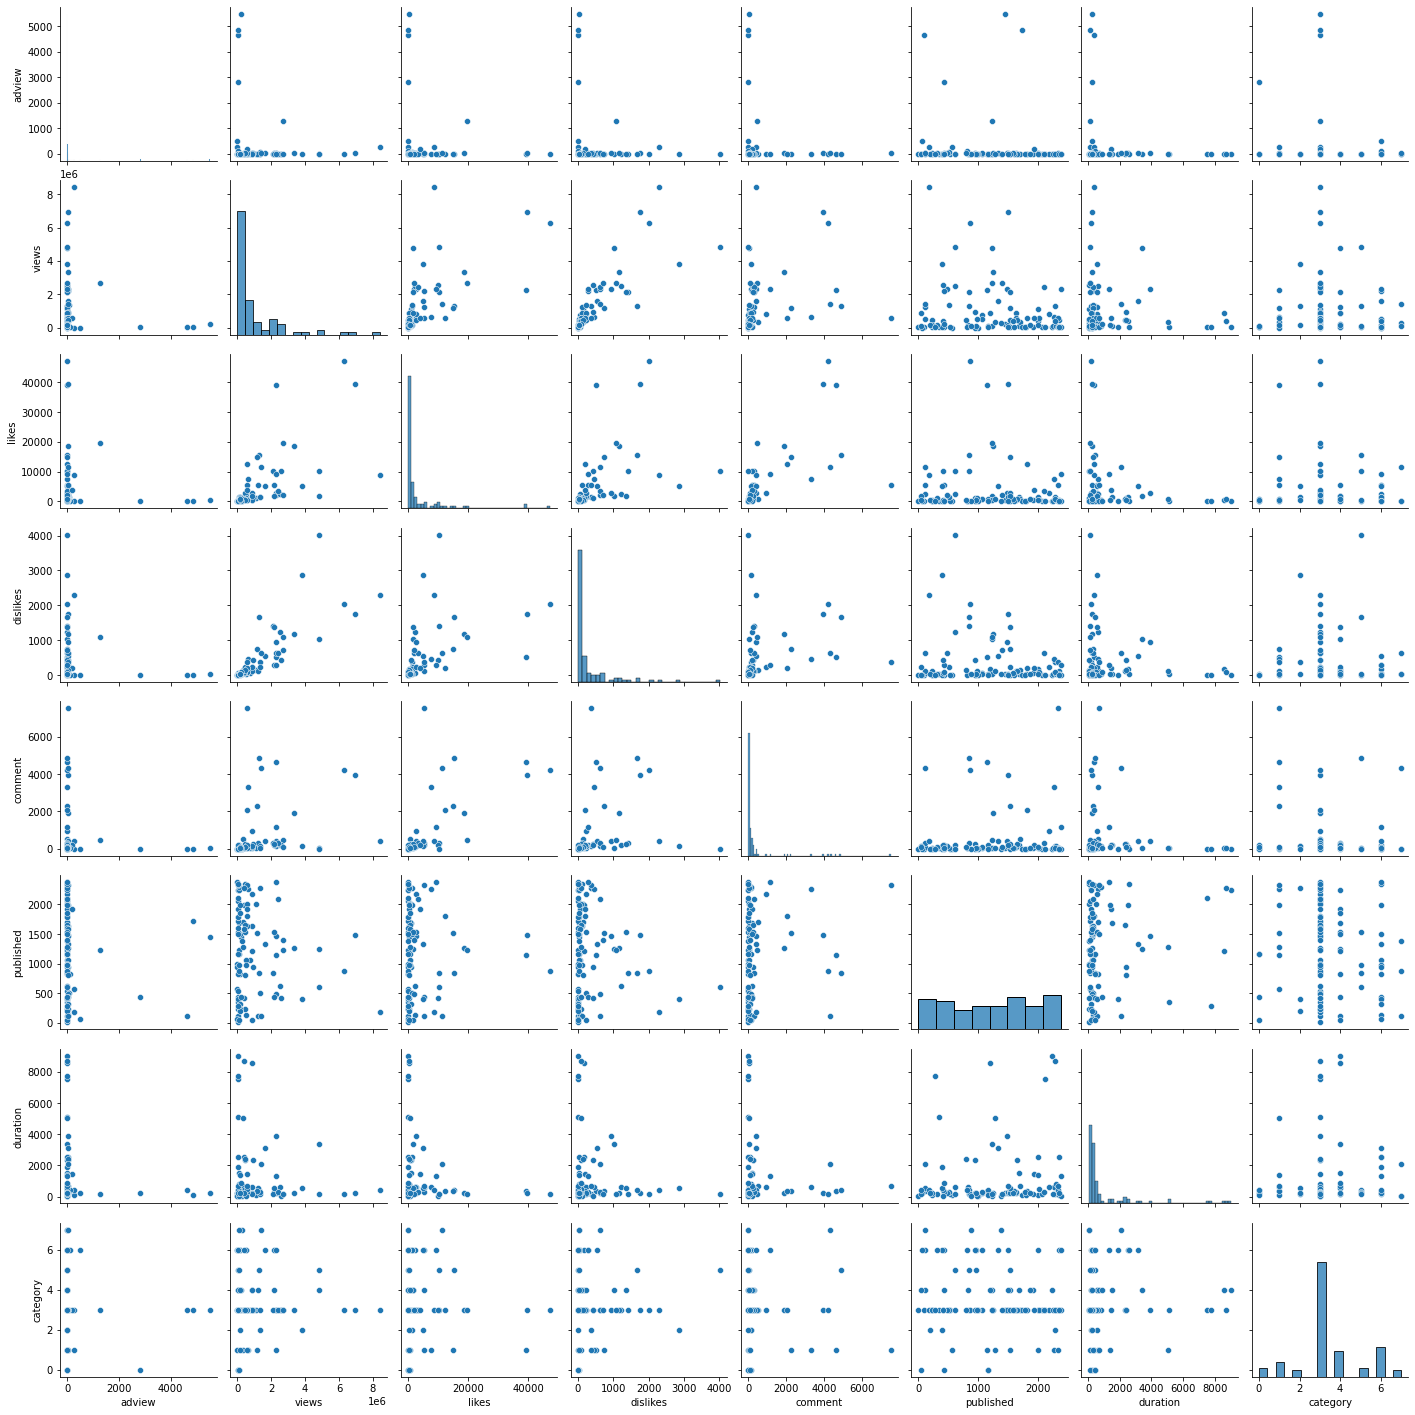

In [117]:
pairplot=sns.pairplot(df1.sample(100,random_state=0))

In [118]:
df1.describe()

,adview,views,likes,dislikes,comment,published,duration,category
count,1.499900e+04,1.499900e+04,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,2.107791e+03,7.134752e+05,2739.423428,253.969065,400.174145,1211.792386,1045.884059,3.604574
std,5.237711e+04,2.724531e+06,8851.481213,1023.209567,1494.345713,695.575593,2313.382209,1.580268
min,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000e+00,3.120100e+04,83.000000,7.000000,7.000000,606.000000,186.000000,3.000000
50%,2.000000e+00,1.583170e+05,434.000000,37.000000,43.000000,1220.000000,325.000000,3.000000
75%,6.000000e+00,5.846100e+05,1815.500000,166.000000,215.000000,1825.000000,729.500000,5.000000
max,5.429665e+06,1.380479e+08,283824.000000,49449.000000,75045.000000,2385.000000,42317.000000,7.000000


In [119]:
df1.corr()

,adview,views,likes,dislikes,comment,published,duration,category
adview,1.000000,0.032054,0.044040,0.035852,0.015801,0.001414,-0.013359,0.007641
views,0.032054,1.000000,0.719122,0.723686,0.408631,-0.007364,0.005878,0.034346
likes,0.044040,0.719122,1.000000,0.648235,0.650171,-0.007298,-0.043008,-0.007563
dislikes,0.035852,0.723686,0.648235,1.000000,0.528888,-0.010060,0.000532,0.011880
comment,0.015801,0.408631,0.650171,0.528888,1.000000,0.002114,-0.037151,-0.032638
published,0.001414,-0.007364,-0.007298,-0.010060,0.002114,1.000000,-0.008154,0.008599
duration,-0.013359,0.005878,-0.043008,0.000532,-0.037151,-0.008154,1.000000,0.050779
category,0.007641,0.034346,-0.007563,0.011880,-0.032638,0.008599,0.050779,1.000000


<AxesSubplot:>

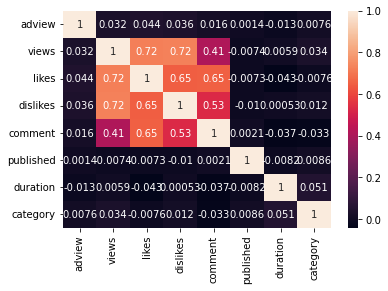

In [120]:
sns.heatmap(df1.corr(),annot=True)

In [121]:
df1.drop(['adview'],inplace=True,axis=1)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size = 0.2, random_state=42)

In [157]:
X_train.head()

,views,likes,dislikes,comment,published,duration,category
9838,377366,308,98,22,594,8845,3
7689,2176,6,0,0,1109,734,6
6557,1058,3,0,0,408,137,7
6872,25320,31,0,0,819,165,6
820,16565,31,6,1,930,97,2


In [135]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [125]:
model=make_pipeline(StandardScaler(),LinearRegression())
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [126]:
model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [127]:
y_pred1=model.predict(X_test)
y_pred1[:5]


array([[1013.40609792],
       [ 828.32595363],
       [1724.37890903],
       [2013.53438157],
       [1053.87987242]])

In [128]:
y_test[:5]

,adviews
6723,1
6473,33
4679,3
862,4
7286,4839


In [140]:
print(f'R2 score: {metrics.r2_score(y_test, y_pred1):.2f}')
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred1)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred1)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred1))}')

R2 score: 0.00
Mean Absolute Error: 5191.909958191997
Mean Squared Error: 10750384947.260498
Root Mean Squared Error: 103684.063130553


In [134]:
from sklearn.tree import DecisionTreeRegressor

In [137]:
tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
y_pred2 = tree.predict(X_train)

In [139]:
print(f'R^2 score: {tree.score(X_train, y_train)}')
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_train, y_pred2)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_train, y_pred2)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_train, y_pred2))}')

R^2 score: 0.29966195342461854
Mean Absolute Error: 3033.2422117090914
Mean Squared Error: 517145706.58466655
Root Mean Squared Error: 22740.83786021673


In [141]:
from sklearn.ensemble import RandomForestRegressor

In [142]:
forest=RandomForestRegressor(n_estimators=100,random_state=42)
forest.fit(X_train,y_train)
y_pred3=forest.predict(X_train)

C:\Users\Chara\AppData\Local\Temp/ipykernel_15312/2124533598.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)


In [143]:
print(f'R^2 score: {forest.score(X_train, y_train)}')
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_train, y_pred3)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_train, y_pred3)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_train, y_pred3))}')

R^2 score: 0.8612869801737398
Mean Absolute Error: 1200.6352887740645
Mean Squared Error: 102428881.31142384
Root Mean Squared Error: 10120.715454523155


In [146]:
from sklearn.svm import SVR

In [147]:
model1=make_pipeline(StandardScaler(),SVR(kernel='rbf',C=1e3,gamma=0.1))
model1.fit(X_train,y_train)
y_pred4=model1.predict(X_train)

C:\Users\Chara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [148]:
print(f'R^2 score: {model1.score(X_train, y_train)}')
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_train, y_pred4)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_train, y_pred4)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_train, y_pred4))}')

R^2 score: -0.003795006329519124
Mean Absolute Error: 1753.3049733579815
Mean Squared Error: 741225298.77229
Root Mean Squared Error: 27225.453141725484


In [151]:
from keras.models import Sequential
from keras.layers import Dense


In [158]:
model2 = Sequential()
model2.add(Dense(500, input_dim=7, activation= "relu"))
model2.add(Dense(100, activation= "relu"))
model2.add(Dense(50, activation= "relu"))
model2.add(Dense(1))

In [159]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               4000      
                                                                 
 dense_5 (Dense)             (None, 100)               50100     
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 59,201
Trainable params: 59,201
Non-trainable params: 0
_________________________________________________________________


In [160]:
model2.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [161]:
model2.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
375/375 [==============================] - 5s 5ms/step - loss: 2995314432.0000 - mean_squared_error: 2995314432.0000
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 2653684992.0000 - mean_squared_error: 2653684992.0000
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 2082176256.0000 - mean_squared_error: 2082176256.0000
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 796743424.0000 - mean_squared_error: 796743424.0000
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 768319744.0000 - mean_squared_error: 768319744.0000
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 759041088.0000 - mean_squared_error: 759041088.0000
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 877357504.0000 - mean_squared_error: 877357504.0000
Epoch 8/100
375/375 [==============================] - 2s 4ms/step - loss: 787185216.0000 - mean_squared_

In [162]:
from joblib import dump, load

In [164]:
dump(forest, 'bestmodel.joblib') #here random forest regressor performed better than the other models and we save it as bestmodel.joblib

['bestmodel.joblib']

In [165]:
df2=pd.read_csv('D:/pythonCode/projects/youtube-adview-prediction/test.csv')

In [166]:
df2.dtypes

vidid        object
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

#cleaning data

In [177]:
for i in range(len(df2['views'])):
    if df2['views'][i]=='F':
        df2['views'][i]=0

for i in range(len(df2['likes'])):
    if df2['likes'][i]=='F':
        df2['likes'][i]=0  

for i in range(len(df2['dislikes'])):
    if df2['dislikes'][i]=='F':
        df2['dislikes'][i]=0

for i in range(len(df2['comment'])):
    if df2['comment'][i]=='F':
        df2['comment'][i]=0 

C:\Users\Chara\AppData\Local\Temp/ipykernel_15312/3408254167.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['comment'][i]=0


In [178]:
df2['views']=df2['views'].astype(np.int64)
df2['likes']=df2['likes'].astype(np.int64)
df2['dislikes']=df2['dislikes'].astype(np.int64)
df2['comment']=df2['comment'].astype(np.int64)

In [179]:
for i in range(len(df2['category'])):
    df2['category'][i]=cate[df2['category'][i]]

C:\Users\Chara\AppData\Local\Temp/ipykernel_15312/1104572212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['category'][i]=cate[df2['category'][i]]


In [180]:
df2['category']=df2['category'].astype(np.int64)

In [182]:
df2['duration']=df2['duration'].apply(checki)
df2['duration']=df2['duration'].apply(func_sec)

In [184]:
df2.drop(['vidid'],inplace=True,axis=1)

In [185]:
df2['published']=label_encoder.fit_transform(df2['published'])

In [186]:
df2.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2055,449,1
1,1040132,8171,340,1047,1827,389,5
2,28534,31,11,1,1010,2274,3
3,1316715,2284,250,274,117,595,6
4,1893173,2519,225,116,1894,188,1


In [187]:
df2.to_csv('D:/pythonCode/projects/youtube-adview-prediction/test_new.csv',index=False)

#now predicting adviews

In [189]:
bestmodel=load('bestmodel.joblib')

In [190]:
adview_pred=bestmodel.predict(df2)

In [192]:
adview_pred[:5]

array([  33.45,  627.86,  118.09,   38.69, 5470.3 ])

In [194]:
ad=pd.DataFrame(adview_pred)

In [196]:
ad.to_csv('D:/pythonCode/projects/youtube-adview-prediction/predictions.csv',index=False) #here we get the predictions for the test data